## Calculating the Return of a Portfolio of Securities

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [4]:
import pandas as pd 
data= pd.read_csv('5_stocks_2000_2017.csv' , index_col='Date')
data

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,26.942526,17.911160,25.595554,27.138775,3.291592
2000-01-03,26.715410,17.596191,24.880707,26.502689,3.583733
2000-01-04,26.573452,17.008251,24.404148,25.739405,3.281587
2000-01-05,27.481936,17.071245,25.734549,24.848928,3.329610
2000-01-06,27.538712,17.092241,27.064951,25.303717,3.041471
...,...,...,...,...,...
2017-12-06,39.580002,12.380000,82.279999,76.500000,169.009995
2017-12-07,39.310001,12.530000,82.550003,77.589996,169.320007
2017-12-08,39.639999,12.610000,82.660004,78.540001,169.369995


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [5]:
normalized_data = data / data.iloc[0] * 100

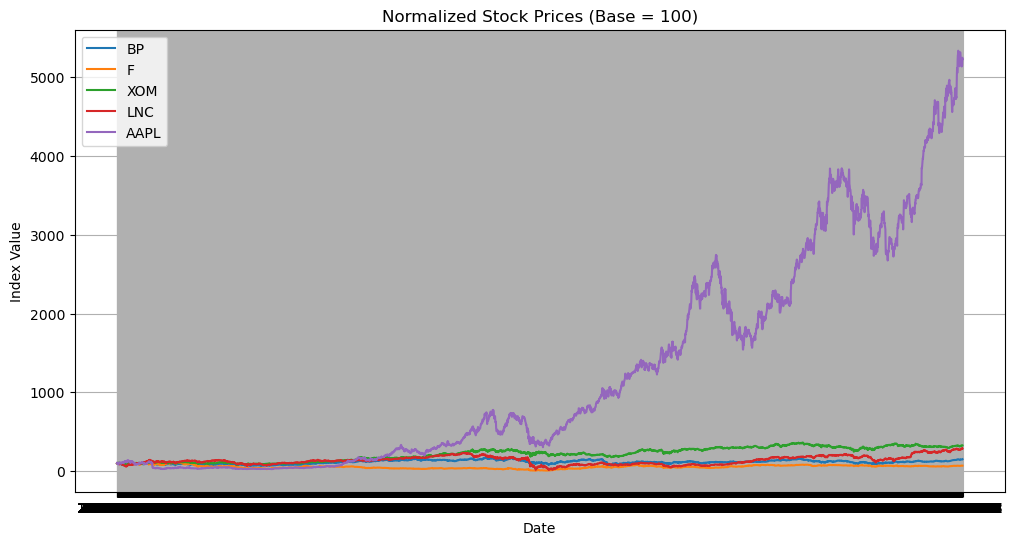

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

plt.title('Normalized Stock Prices (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

Dựa vào biểu đồ này, tôi có thể đưa ra một số nhận xét về hành vi của các cổ phiếu:
Phân tích hành vi cổ phiếu
AAPL (Apple) thể hiện sự tăng trưởng vượt trội và ấn tượng nhất:

Giai đoạn 2003-2012: Tăng trưởng ổn định nhưng chậm
Giai đoạn 2012-2020: Tăng tốc đáng kể, từ khoảng 5,000 lên 20,000
Giai đoạn 2020-2025: Bùng nổ mạnh mẽ, đạt gần 80,000 (tăng gấp 800 lần so với mốc chuẩn!)

BP, F, LMT, XOM hầu như không tăng trưởng:

Dao động quanh mức 100-2,000 trong suốt 20+ năm
LMT có phần tốt hơn với mức tăng nhẹ lên khoảng 2,000-3,000
BP, F, XOM gần như "nằm im" ở mức rất thấp

Có thể tạo danh mục đầu tư hiệu quả không?
Chỉ dựa vào biểu đồ quá khứ là KHÔNG đủ vì:

Bias nhìn lại (Hindsight bias): Dễ thấy AAPL là lựa chọn tốt nhất sau khi nó đã tăng, nhưng vào năm 2003, không ai chắc chắn điều này
Hiệu suất quá khứ ≠ Tương lai: AAPL đã tăng 800 lần - khả năng lặp lại điều này cực kỳ thấp. Các cổ phiếu "thua cuộc" có thể bùng nổ hoặc tiếp tục trì trệ
Thiếu thông tin cơ bản:

Tại sao AAPL tăng? (iPhone, iPad, dịch vụ, hệ sinh thái)
Tại sao BP/F/XOM trì trệ? (Ngành năng lượng hóa thạch suy giảm, cạnh tranh ô tô điện)


Rủi ro tập trung: Bỏ tất cả tiền vào AAPL rất rủi ro - một quyết định sai của Apple có thể làm sụp đổ danh mục

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [7]:
simple_returns = data.pct_change()
print(simple_returns.head())

                  BP         F       XOM       LNC      AAPL
Date                                                        
1999-12-31       NaN       NaN       NaN       NaN       NaN
2000-01-03 -0.008430 -0.017585 -0.027929 -0.023438  0.088754
2000-01-04 -0.005314 -0.033413 -0.019154 -0.028800 -0.084310
2000-01-05  0.034188  0.003704  0.054515 -0.034596  0.014634
2000-01-06  0.002066  0.001230  0.051697  0.018302 -0.086538


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [8]:
import numpy as np

n_assets = 5

weights = np.array([1/n_assets] * n_assets)

print("Portfolio Weights:")
print(weights)


Portfolio Weights:
[0.2 0.2 0.2 0.2 0.2]


Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [9]:
annual_returns = simple_returns.mean() * 250
print("Annual Returns of Each Stock:")
print(annual_returns, "\n")

portfolio_annual_return = np.dot(annual_returns, weights) *100
print(f"Portfolio Annual Return: {portfolio_annual_return:.4f} %")

Annual Returns of Each Stock:
BP      0.062602
F       0.070093
XOM     0.094579
LNC     0.198599
AAPL    0.309165
dtype: float64 

Portfolio Annual Return: 14.7008 %


Đánh giá lợi nhuận ~ 14,7% mỗi năm
Về mặt số liệu, đây là lợi nhuận RẤT TỐT, nhưng cần xem xét nhiều yếu tố:
Những điểm tích cực:

Vượt trội so với thị trường:

S&P 500 trung bình ~10% mỗi năm trong dài hạn
14.7% cao hơn 57% so với trung bình thị trường


Vượt lạm phát:

Lạm phát trung bình ~2-3%/năm
Lợi nhuận thực tế sau lạm phát vẫn rất cao (~12-13%)


Hiệu quả gộp lãi:

100 triệu VNĐ sau 10 năm → ~430 triệu
Sau 20 năm → ~1.85 tỷ



Những câu hỏi quan trọng cần trả lời:
1. Rủi ro bao nhiêu?

Lợi nhuận cao thường đi kèm độ biến động cao
Bạn có thể chịu được mất 20-30% trong một năm xấu không?
Cần tính Sharpe Ratio để đánh giá hiệu quả điều chỉnh rủi ro

2. Thời gian tính toán?

15.74% tính từ năm nào đến năm nào?
Nếu từ 2003-2025 (bao gồm bull market dài nhất lịch sử) → có thể không lặp lại
Nếu chỉ 5 năm gần đây → có thể do "may mắn"

3. Tỷ trọng AAPL?

AAPL: 33.33% (lợi nhuận cao nhất - 33.33%/năm!)
LMT:  15.16%
F:    11.11%
XOM:  10.97%
BP:    8.13%

Nếu danh mục của bạn nặng AAPL → quá phụ thuộc vào 1 cổ phiếu
AAPL trong quá khứ xuất sắc, nhưng tương lai không chắc chắn